In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("Fraud.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.shape

(6362620, 11)

In [6]:
target = 'isFraud'
features = [feature for feature in data.columns if feature not in [target]]

In [7]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFraud', ylabel='count'>

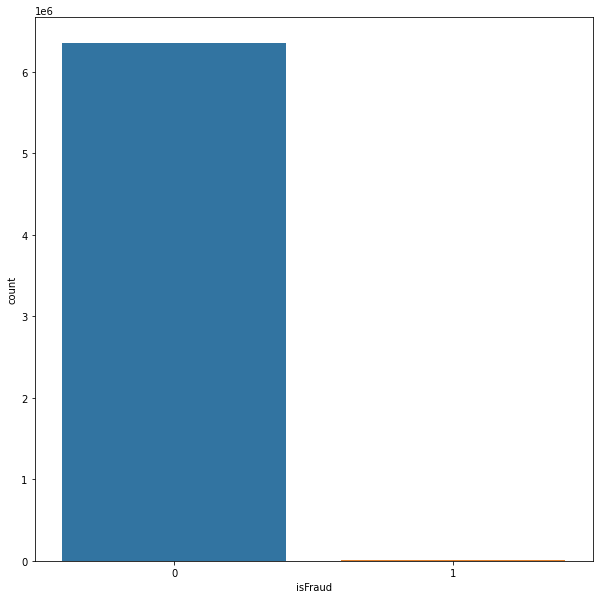

In [8]:
plt.figure(figsize=[10, 10])
sns.countplot(data[target])

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


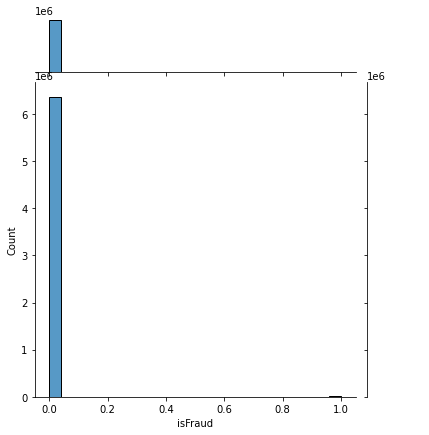

In [9]:
sns.jointplot(data[target], kind="hist")

In [10]:
data[target].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

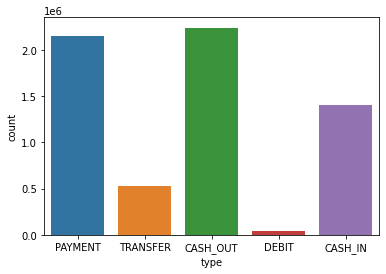

In [11]:
sns.countplot(data['type'])

In [12]:
data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount', ylabel='Density'>

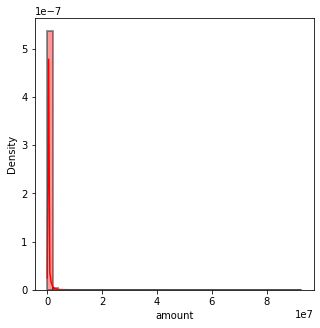

In [13]:
plt.figure(figsize=[5, 5])
sns.distplot(data['amount'], color='r', hist_kws=dict(edgecolor='black', linewidth=2), bins=50)

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldbalanceOrg'>

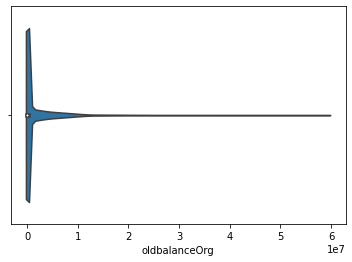

In [14]:
sns.violinplot(data['oldbalanceOrg'])

In [15]:
data.groupby([target, 'type']).size().unstack()

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,
0,1399284.0,2233384.0,41432.0,2151495.0,528812.0
1,NaN,4116.0,NaN,NaN,4097.0


In [16]:
data[target].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import plot_tree

In [18]:
df = pd.read_csv("Fraud.csv")

In [19]:
aux = []
for Dest in df['nameDest'].values:
    if Dest[0] == 'M':
        comerciante = 1
    else:
        comerciante = 0
    aux.append(comerciante)
df['DestComerciante'] = aux

In [20]:
df['oldbalanceDest'] = df['oldbalanceDest'].where(df['DestComerciante'] == 0, other=np.nan)
df['newbalanceDest'] = df['newbalanceDest'].where(df['DestComerciante'] == 0, other=np.nan)

In [21]:
display(df.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.00,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.94,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.00,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.00,1.442584e+05,4.958504e+07
oldbalanceDest,4211125.0,1.663058e+06,4.064780e+06,0.0,139659.05,551247.21,1.692951e+06,3.560159e+08
newbalanceDest,4211125.0,1.850856e+06,4.386080e+06,0.0,221717.59,683724.79,1.910979e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.00,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.00,0.000000e+00,1.000000e+00
DestComerciante,6362620.0,3.381461e-01,4.730786e-01,0.0,0.00,0.00,1.000000e+00,1.000000e+00


In [22]:
mylist = list(df['nameOrig'] == df['nameDest'])
myset = set(mylist)
print(f'List of unique values from created list: {myset}')

List of unique values from created list: {False}


In [23]:
aux = []
for Dest in df['nameOrig'].values:
    if Dest[0] == 'M':
        merchant = 1
    else:
        merchant = 0
    aux.append(merchant)

myset = set(aux)
print(f'List of unique values of created aux list: {myset}')

List of unique values of created aux list: {0}


In [24]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [25]:
df = df.drop('step', axis=1)

In [26]:
normal_transactions = len(df[df['isFraud'] == 0])
fraudulent_transactions = len(df[df['isFraud'] == 1])
print('\nNumber of normal transaction: {:,} ({:1.3%})'.format(normal_transactions, normal_transactions/len(df)))
print('Number of Fraudulent transaction: {:,} ({:1.3%})\n'.format(fraudulent_transactions, fraudulent_transactions/len(df)))


Number of normal transaction: 6,354,407 (99.871%)
Number of Fraudulent transaction: 8,213 (0.129%)



In [27]:
df_tr_fraud = df[df['isFraud'] == 1]
df_tr_norm = df[df['isFraud'] == 0]
df_tr_norm_under = df_tr_norm.sample(fraudulent_transactions, random_state=1)
df_balanced = pd.concat([df_tr_fraud, df_tr_norm_under])
df_balanced = df_balanced.reset_index(drop=True)

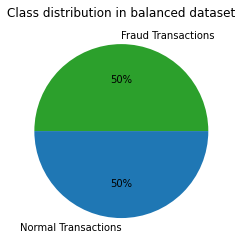

In [28]:
plt.pie(
        [len(df_balanced[df_balanced['isFraud'] == 1]), len(df_balanced[df_balanced['isFraud'] == 0])],
        labels=['Fraud Transactions', 'Normal Transactions'],
        autopct='%1.0f%%',
        colors=['tab:green', 'tab:blue']
       )
plt.title('Class distribution in balanced dataset')
plt.show()

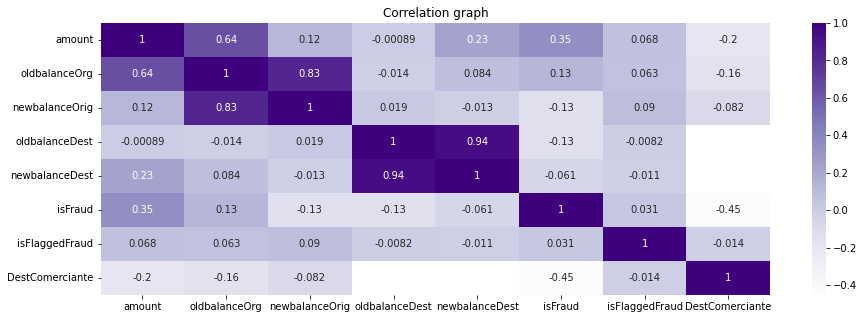

In [29]:
plt.figure(figsize=(15,5))
sns.heatmap(df_balanced.corr(), cmap='Purples', annot=True)
plt.title('Correlation graph')
plt.show()

In [30]:
df_balanced = df_balanced.fillna(0)

In [31]:
x = df_balanced.drop('isFraud', axis=1)
y = df_balanced['isFraud']

In [32]:
x = pd.get_dummies(x)
display(x.head())

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,DestComerciante,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,181.0,181.0,0.0,0.0,0.0,0,0,0,0,0,0,1
1,181.0,181.0,0.0,21182.0,0.0,0,0,0,1,0,0,0
2,2806.0,2806.0,0.0,0.0,0.0,0,0,0,0,0,0,1
3,2806.0,2806.0,0.0,26202.0,0.0,0,0,0,1,0,0,0
4,20128.0,20128.0,0.0,0.0,0.0,0,0,0,0,0,0,1


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [34]:
classify_fraud = RandomForestClassifier(n_estimators=100, random_state=1)
#Train model
classify_fraud.fit(x_train, y_train)
#Test model
y_pred = classify_fraud.predict(x_test)

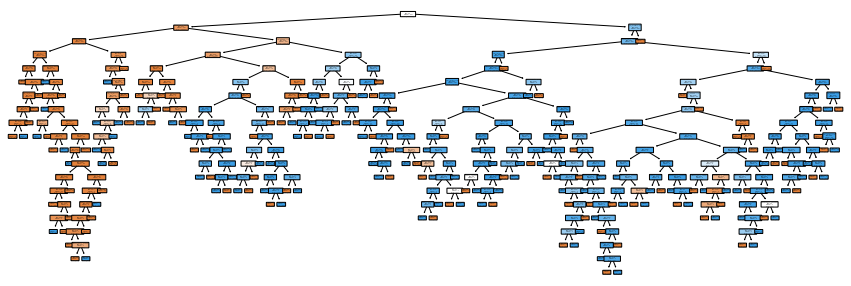

In [35]:
n_tree=50

fig = plt.figure(figsize=(15, 5))
plot_tree(
          classify_fraud.estimators_[n_tree],
          feature_names=x.columns,
          filled=True, impurity=True, rounded=True
         )
plt.show()

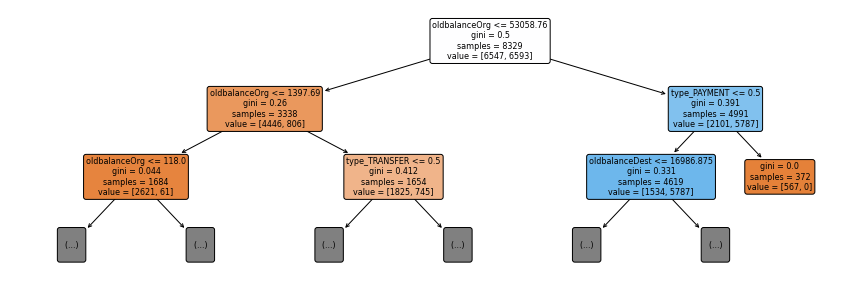

In [36]:
fig = plt.figure(figsize=(15, 5))
plot_tree(
          classify_fraud.estimators_[n_tree],
          feature_names=x.columns,
          max_depth=2,
          filled=True, impurity=True, rounded=True
         )
plt.show()

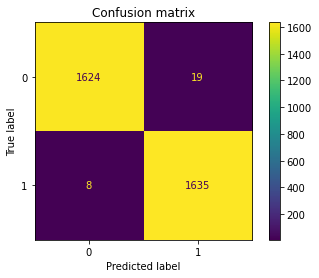



Classification_report:

               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1643
           1       0.99      1.00      0.99      1643

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



In [37]:
graph = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=classify_fraud.classes_)
graph.plot()
plt.title('Confusion matrix')
plt.show()

print('\n\nClassification_report:\n\n',classification_report(y_test, y_pred))

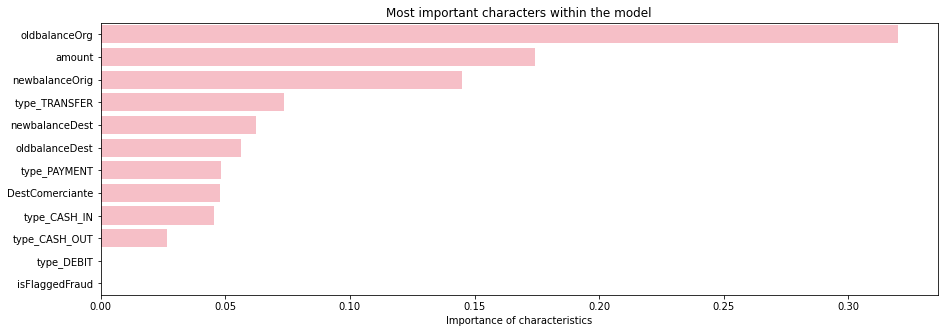

In [38]:
#Generate data
feature_importances = pd.DataFrame(classify_fraud.feature_importances_, x.columns)
feature_importances = feature_importances.sort_values(by=0, ascending=False)
feature_importances = feature_importances.rename(columns={0: 'Importance of characteristics'})

#Plot chart
plt.figure(figsize=(15,5))
sns.barplot(x=feature_importances['Importance of characteristics'], y=feature_importances.index, color='lightpink')
plt.title('Most important characters within the model')
plt.show()